## Customer Complaint

In [1]:
%pip install seaborn

In [2]:
# Importing modules needed for processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import seaborn as sns

In [3]:
df = pd.read_csv('Complaintdata.csv')
df.head()

,Date received,Product,Sub-product,Issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,5/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,5/10/2019,In progress,Yes,NaN,3238275
1,5/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,5/10/2019,Closed with explanation,Yes,NaN,3238228
2,5/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,5/10/2019,Closed with explanation,Yes,NaN,3237964
3,5/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,5/10/2019,Closed with explanation,Yes,NaN,3238479
4,5/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,5/10/2019,In progress,Yes,NaN,3238460


In [4]:
df.shape

(5309, 16)

In [5]:
train = "Complaintdata.csv"
test = "Complaintdata.csv"

In [6]:
train_data = pd.read_csv(train, parse_dates=['Date received', 'Date sent to company'])
test_data = pd.read_csv(test, parse_dates=['Date received', 'Date sent to company'])

main_train_data = train_data
main_test_data = test_data

In [7]:
train_data.head(5)

,Date received,Product,Sub-product,Issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-05-10,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,2019-05-10,In progress,Yes,NaN,3238275
1,2019-05-10,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,2019-05-10,Closed with explanation,Yes,NaN,3238228
2,2019-05-10,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,2019-05-10,Closed with explanation,Yes,NaN,3237964
3,2019-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,2019-05-10,Closed with explanation,Yes,NaN,3238479
4,2019-05-10,Checking or savings account,Checking account,Managing an account,Banking errors,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,2019-05-10,In progress,Yes,NaN,3238460


In [8]:
test_data.tail(5)

,Date received,Product,Sub-product,Issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
5304,2019-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,FL,334XX,NaN,NaN,Web,2019-04-25,In progress,Yes,NaN,3222115
5305,2019-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,LA,70835,NaN,Consent not provided,Web,2019-04-25,Closed with explanation,Yes,NaN,3222782
5306,2019-04-25,Debt collection,Private student loan debt,Communication tactics,"You told them to stop contacting you, but they...","Green & Sons Agency, Inc.",UT,840XX,NaN,NaN,Web,2019-04-25,Closed with explanation,Yes,NaN,3222579
5307,2019-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",FL,331XX,NaN,NaN,Web,2019-04-25,In progress,Yes,NaN,3223167
5308,2019-04-25,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,"WESTERN UNION COMPANY, THE",AZ,852XX,Servicemember,NaN,Web,2019-04-25,Closed with explanation,Yes,NaN,3222304


In [9]:
test_data.shape

(5309, 16)

### Company response to consumer

Closed with explanation            2983
In progress                        1710
Closed with non-monetary relief     519
Closed with monetary relief          79
Untimely response                    18
Name: Company response to consumer, dtype: int64


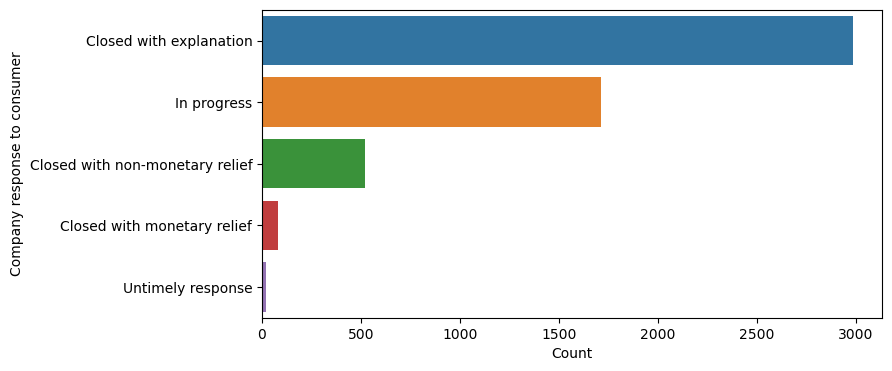

In [10]:
print(df['Company response to consumer'].value_counts())
data = df['Company response to consumer'].value_counts().head(10).index
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Company response to consumer', order=data)
plt.xlabel('Count')
plt.ylabel('Company response to consumer');

In [11]:
df['Consumer complaint narrative'].nunique

<bound method IndexOpsMixin.nunique of 0                       Problem using a debit or ATM card
1                                Deposits and withdrawals
2                              Frequent or repeated calls
3            Old information reappears or never goes away
4                                          Banking errors
                              ...                        
5304                  Information belongs to someone else
5305                  Information belongs to someone else
5306    You told them to stop contacting you, but they...
5307                  Information belongs to someone else
5308                                                  NaN
Name: Consumer complaint narrative, Length: 5309, dtype: object>

In [12]:
df['Submitted via'].nunique()

5

In [13]:
df.groupby(['Submitted via','Company response to consumer']).count()

Date received  Product  \
Submitted via Company response to consumer                              
Fax           Closed with explanation                     33       33   
              Closed with non-monetary relief              6        6   
              In progress                                 20       20   
Phone         Closed with explanation                    127      127   
              Closed with monetary relief                 11       11   
              Closed with non-monetary relief              7        7   
              In progress                                 69       69   
Postal mail   Closed with explanation                     77       77   
              Closed with monetary relief                  1        1   
              Closed with non-monetary relief             16       16   
              In progress                                 43       43   
Referral      Closed with explanation                    150      150   
              Closed with monetary relief                 16       16   
              Closed with non-monetary relief             10       10   
              In progress                                106      106   
Web           Closed with explanation                   2596     2596   
              Closed with monetary relief                 51       51   
              Closed with non-monetary relief            480      480   
              In progress                               1472     1472   
              Untimely response                           18       18   

                                               Sub-product  Issue  \
Submitted via Company response to consumer                          
Fax           Closed with explanation                   33     33   
              Closed with non-monetary relief            6      6   
              In progress                               20     20   
Phone         Closed with explanation                  127    127   
              Closed with monetary relief               11     11   
              Closed with non-monetary relief            7      7   
              In progress                               69     69   
Postal mail   Closed with explanation                   77     77   
              Closed with monetary relief                1      1   
              Closed with non-monetary relief           16     16   
              In progress                               43     43   
Referral      Closed with explanation                  150    150   
              Closed with monetary relief               16     16   
              Closed with non-monetary relief           10     10   
              In progress                              106    106   
Web           Closed with explanation                 2596   2596   
              Closed with monetary relief               51     51   
              Closed with non-monetary relief          480    480   
              In progress                             1472   1472   
              Untimely response                         18     18   

                                               Consumer complaint narrative  \
Submitted via Company response to consumer                                    
Fax           Closed with explanation                                    30   
              Closed with non-monetary relief                             6   
              In progress                                                16   
Phone         Closed with explanation                                   104   
              Closed with monetary relief                                 8   
              Closed with non-monetary relief                             7   
              In progress                                                51   
Postal mail   Closed with explanation                                    60   
              Closed with monetary relief                                 1   
              Closed with non-monetary relief       

### State

FL    732
CA    597
TX    543
NY    373
GA    350
NC    218
IL    195
PA    160
NJ    159
OH    142
VA    123
TN    116
MD    107
IN     98
MO     94
LA     80
MI     76
AZ     74
AL     70
MA     69
SC     65
CO     64
WA     60
CT     55
NV     52
UT     46
MN     44
OR     37
AR     37
OK     33
MS     32
KY     31
WI     31
KS     19
NM     18
PR     18
IA     15
RI     15
DE     15
DC     14
ME     13
ID     10
NH     10
HI     10
MT      9
AK      7
NE      6
WV      5
WY      4
ND      3
SD      2
AP      1
VT      1
Name: State, dtype: int64


<AxesSubplot:xlabel='State', ylabel='count'>

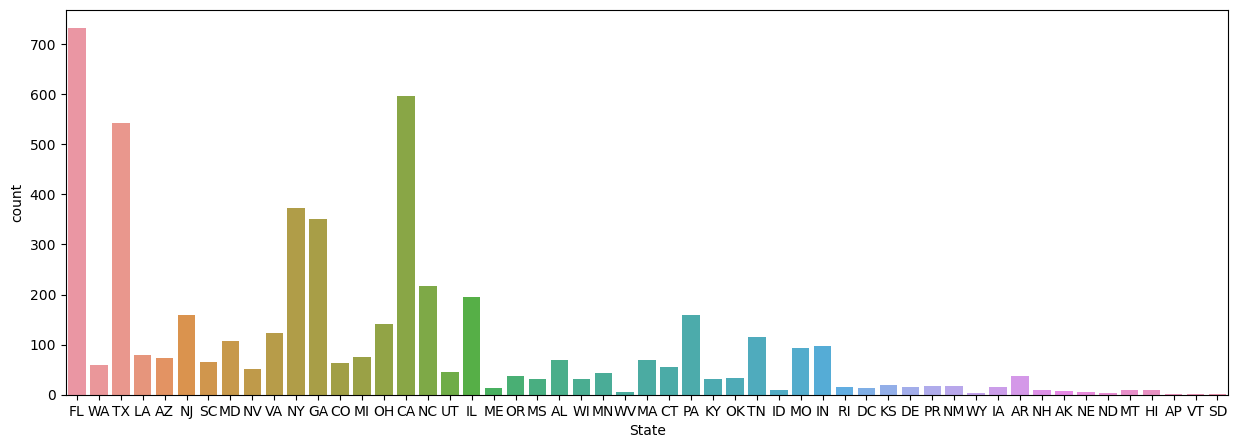

In [14]:
fig, ax = plt.subplots(figsize = (15,5))
print(df['State'].value_counts())
sns.countplot(x='State', data=df)

### Product

<AxesSubplot:>

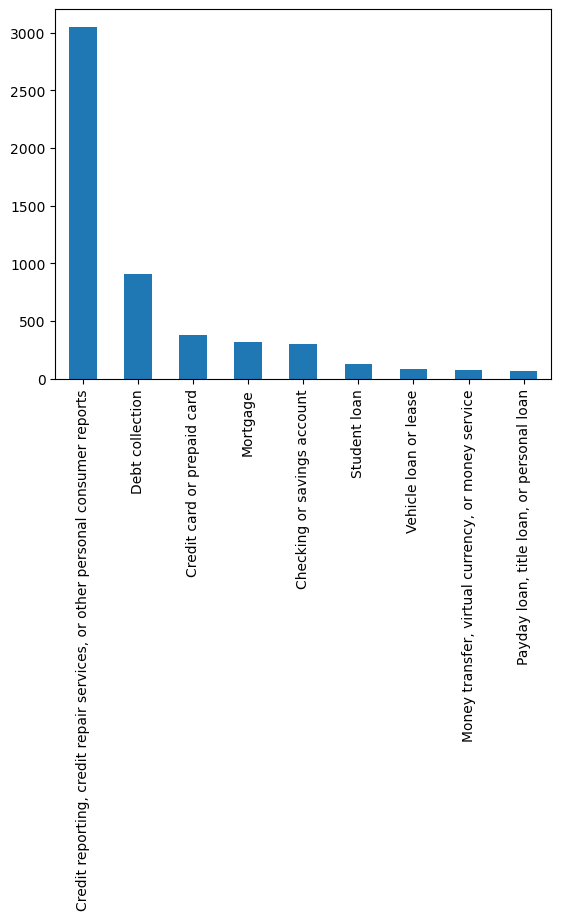

In [15]:
df['Product'].value_counts().head(10).plot.bar()

### Sub-product

<AxesSubplot:>

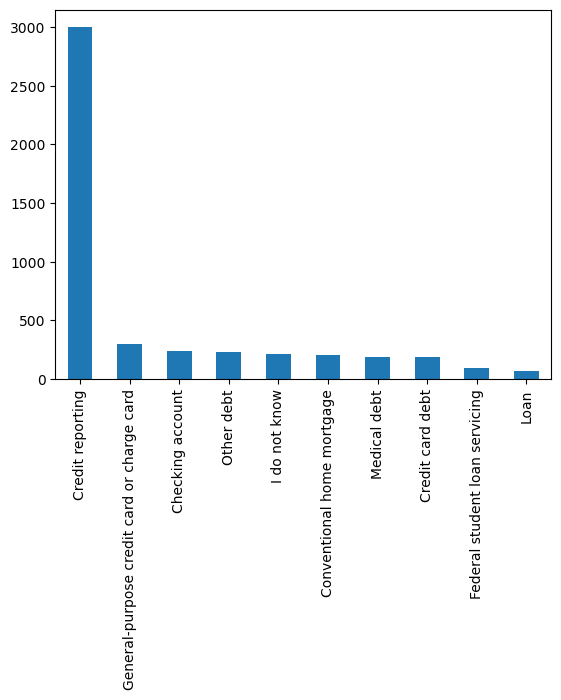

In [16]:
df['Sub-product'].value_counts().head(10).plot.bar()

### The plot shows the state wise distribution of all product.

<AxesSubplot:xlabel='State'>

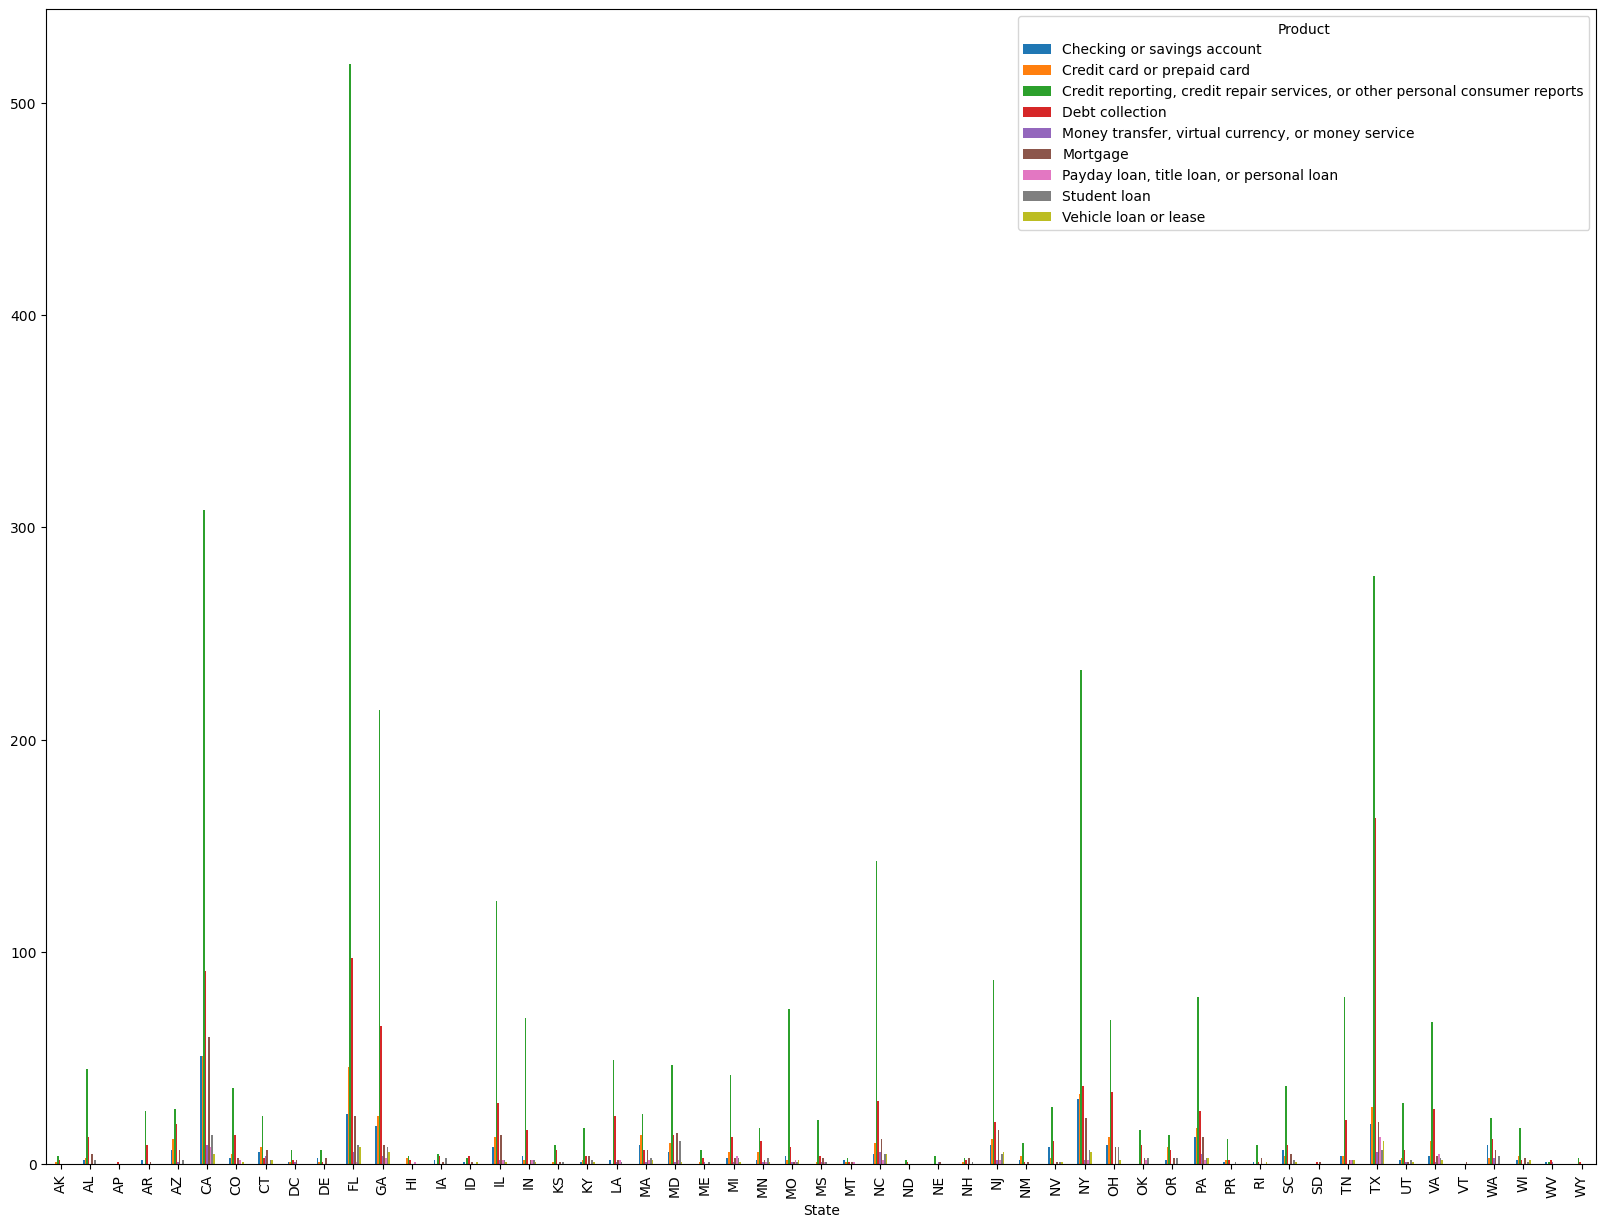

In [17]:
fig, ax = plt.subplots(figsize = (20,15))
df.groupby(['State','Product']).count()['Date received'].unstack().plot.bar(ax=ax)

## Submitted via

In [18]:
train_data['Submitted via'].value_counts().to_frame()

,Submitted via
Web,4617
Referral,282
Phone,214
Postal mail,137
Fax,59


<AxesSubplot:xlabel='Submitted via', ylabel='count'>

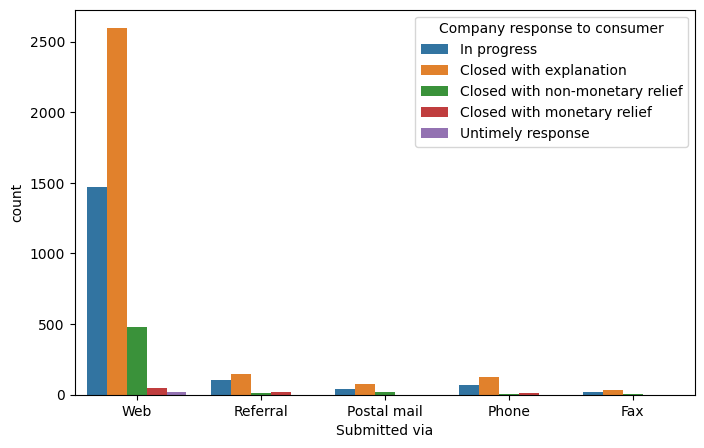

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(x="Submitted via", hue="Company response to consumer", data=df)

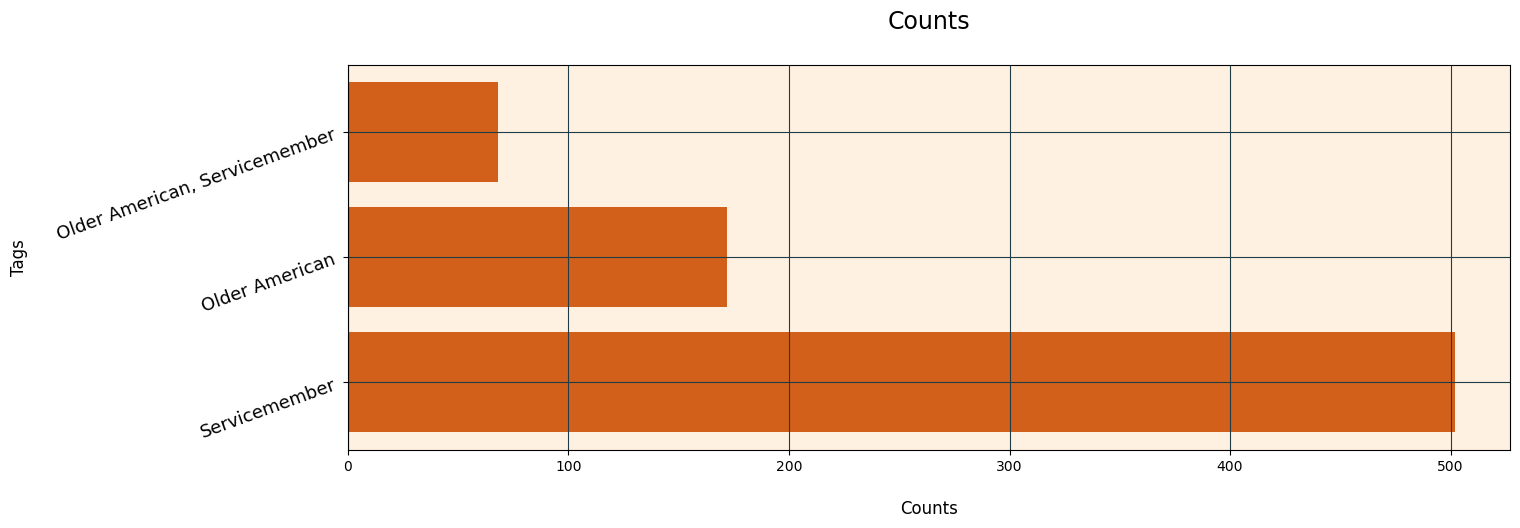

In [20]:
response_counts = train_data['Tags'].value_counts()
response = response_counts.index
counts = response_counts.values
plt.figure(figsize=(15, 5))
ax = plt.axes()
plt.barh(response, counts, color='#d2601a') # Color name is Orange
plt.grid(color='#1d3c45')# Color name is Pine Green
ax.set_facecolor('#fff1e1') # Color name is Light Peach
plt.xlabel('\nCounts', fontsize=12)
plt.ylabel('Tags\n', fontsize=12)
plt.yticks(rotation=20, fontsize='13')
plt.title('Counts\n', fontsize=17)
plt.show()

In [21]:
# Making a temporary dataset
response = pd.DataFrame()
response['Timely Response?'] = train_data['Timely response?']
response['Consumer disputed?'] = train_data['Consumer disputed?']
response['State'] = train_data['State']
response


,Timely Response?,Consumer disputed?,State
0,Yes,NaN,FL
1,Yes,NaN,WA
2,Yes,NaN,TX
3,Yes,NaN,LA
4,Yes,NaN,AZ
...,...,...,...
5304,Yes,NaN,FL
5305,Yes,NaN,LA
5306,Yes,NaN,UT
5307,Yes,NaN,FL


In [22]:
# Check how many timely responses were observed
t_res = response['Timely Response?'].value_counts()
t_res

Yes    5291
No       18
Name: Timely Response?, dtype: int64

In [23]:
# Check how many time customer disputed
c_dis = response['Consumer disputed?'].value_counts()
c_dis

Series([], Name: Consumer disputed?, dtype: int64)

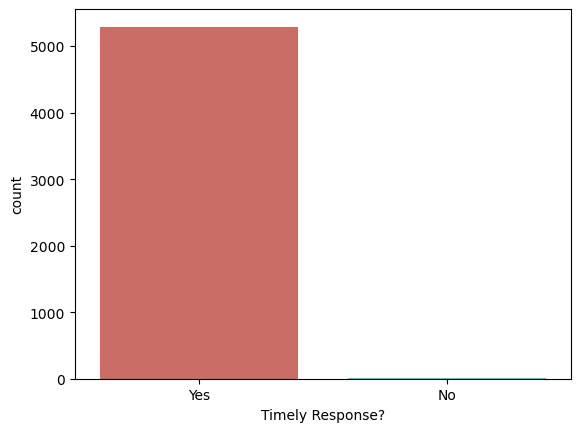

In [24]:
sns.countplot(x='Timely Response?', data=response, palette='hls')
plt.show()

## Datetime analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5309 entries, 0 to 5308
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 5309 non-null   object 
 1   Product                       5309 non-null   object 
 2   Sub-product                   5309 non-null   object 
 3   Issue                         5309 non-null   object 
 4   Consumer complaint narrative  4805 non-null   object 
 5   Company                       5309 non-null   object 
 6   State                         5158 non-null   object 
 7   ZIP code                      4587 non-null   object 
 8   Tags                          742 non-null    object 
 9   Consumer consent provided?    1067 non-null   object 
 10  Submitted via                 5309 non-null   object 
 11  Date sent to company          5309 non-null   object 
 12  Company response to consumer  5309 non-null   object 
 13  Tim

In [26]:
df['Day'] = pd.to_datetime(df['Date received']).dt.day
df['Month'] = pd.to_datetime(df['Date received']).dt.month
df['Year'] = pd.to_datetime(df['Date received']).dt.year

df.head()

,Date received,Product,Sub-product,Issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year
0,5/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,5/10/2019,In progress,Yes,NaN,3238275,10,5,2019
1,5/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,5/10/2019,Closed with explanation,Yes,NaN,3238228,10,5,2019
2,5/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,5/10/2019,Closed with explanation,Yes,NaN,3237964,10,5,2019
3,5/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,5/10/2019,Closed with explanation,Yes,NaN,3238479,10,5,2019
4,5/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,5/10/2019,In progress,Yes,NaN,3238460,10,5,2019


### This plot shows the distribution of Company response to consumer based on the 'Month' of the complaint filing.

<AxesSubplot:xlabel='Month'>

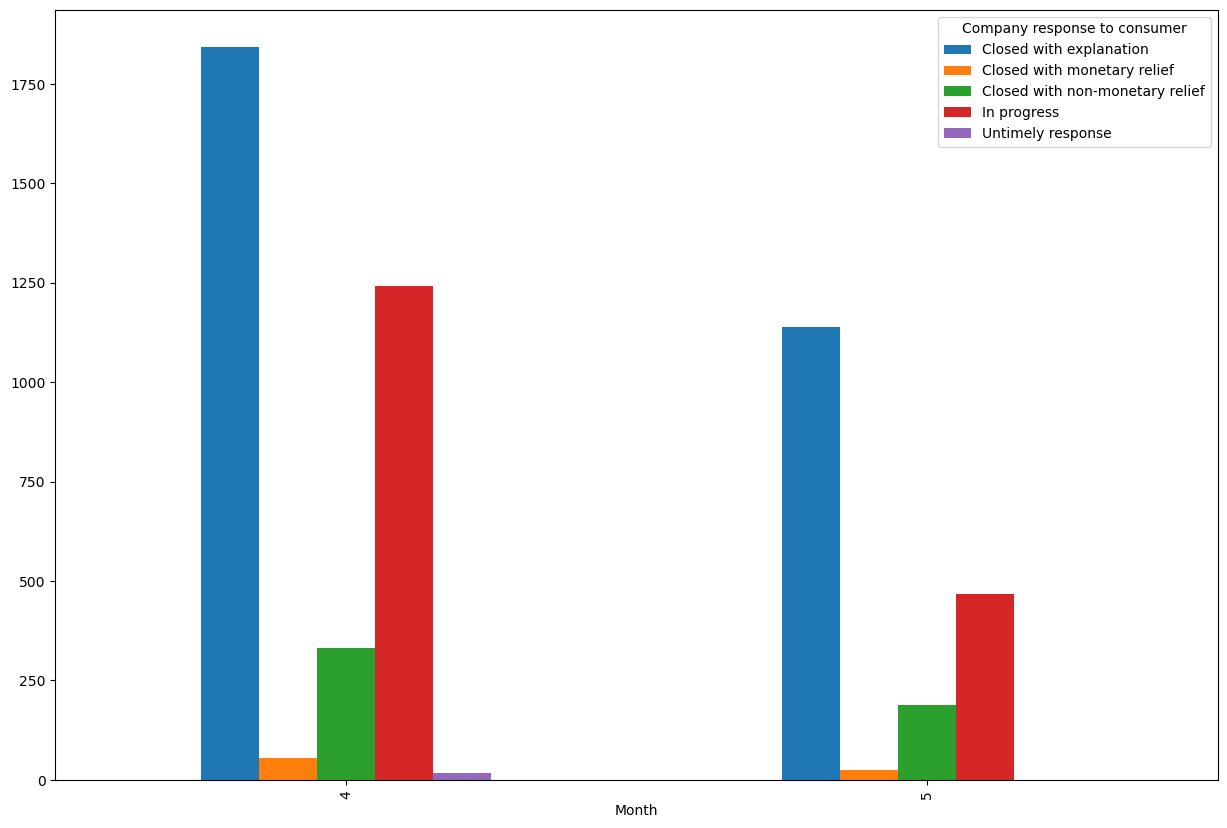

In [27]:
fig, ax = plt.subplots(figsize = (15,10))
df.groupby(['Month','Company response to consumer']).count()['Complaint ID'].unstack().plot.bar(ax=ax)

In [28]:
time_data = pd.DataFrame({})
time_data['Date'] = train_data['Date received']
time_data['Month Name'] = train_data['Date received'].dt.month_name()
time_data['Month Number'] = train_data['Date received'].dt.month
time_data['Day Name'] = train_data['Date received'].dt.day_name()
time_data['Day Number'] = train_data['Date received'].dt.day
time_data['Year'] = train_data['Date received'].dt.year
#time_data['Month/Year'] = time_data['Month Number'].map(str) + '-' + time_data['Year'].map(str)
#time_data['Month/Year'] = pd.to_datetime(time_data['Month/Year']).dt.to_period('M')
time_data

,Date,Month Name,Month Number,Day Name,Day Number,Year
0,2019-05-10,May,5,Friday,10,2019
1,2019-05-10,May,5,Friday,10,2019
2,2019-05-10,May,5,Friday,10,2019
3,2019-05-10,May,5,Friday,10,2019
4,2019-05-10,May,5,Friday,10,2019
...,...,...,...,...,...,...
5304,2019-04-25,April,4,Thursday,25,2019
5305,2019-04-25,April,4,Thursday,25,2019
5306,2019-04-25,April,4,Thursday,25,2019
5307,2019-04-25,April,4,Thursday,25,2019


In [29]:
format_date = time_data.groupby(['Date']).size().to_frame('Counts')
format_date

,Counts
Date,
2019-04-25,792
2019-04-26,815
2019-04-27,469
2019-04-28,316
2019-04-29,600
2019-04-30,499
2019-05-01,384
2019-05-02,411
2019-05-03,385


#### This plot is word count for Issue vs number of Issue

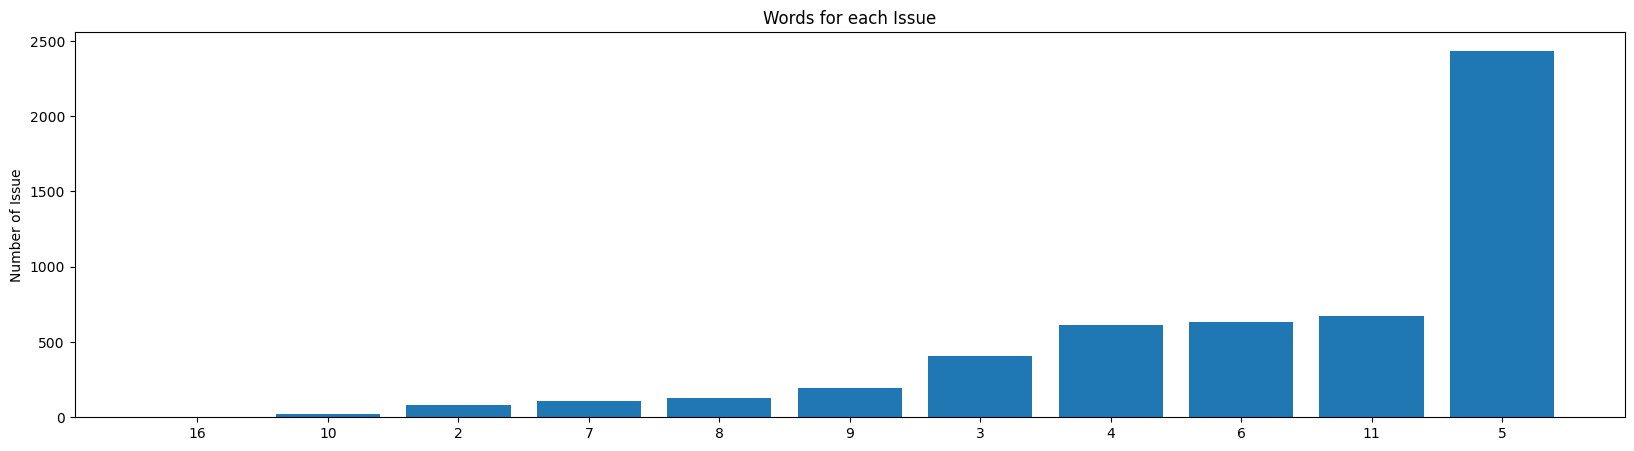

In [30]:
word_count = df['Issue'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of Issue')
plt.title('Words for each Issue')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

#### Below plot shows the box plots of solved and unsolved complaints with respect to word counts in each complaint

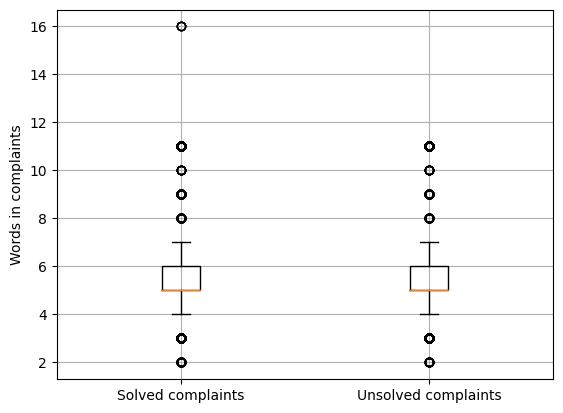

In [31]:
solved_word_count = df[df['Company response to consumer']=='Closed with explanation']['Issue'].str.split().apply(len)
solved_word_count = solved_word_count.values

unsolved_word_count = df[df['Company response to consumer']!='Closed with explanation']['Issue'].str.split().apply(len)
unsolved_word_count = unsolved_word_count.values

# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([solved_word_count, unsolved_word_count])
plt.xticks([1,2],('Solved complaints','Unsolved complaints'))
plt.ylabel('Words in complaints')
plt.grid()
plt.show()

# Preprocessing

In [32]:
df.head()

,Date received,Product,Sub-product,Issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year
0,5/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,5/10/2019,In progress,Yes,NaN,3238275,10,5,2019
1,5/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,5/10/2019,Closed with explanation,Yes,NaN,3238228,10,5,2019
2,5/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,5/10/2019,Closed with explanation,Yes,NaN,3237964,10,5,2019
3,5/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,5/10/2019,Closed with explanation,Yes,NaN,3238479,10,5,2019
4,5/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,5/10/2019,In progress,Yes,NaN,3238460,10,5,2019


In [33]:
import re
from nltk.corpus import stopwords
import pickle
from tqdm import tqdm
import os

In [34]:
 df['Submitted via'].value_counts()

Web            4617
Referral        282
Phone           214
Postal mail     137
Fax              59
Name: Submitted via, dtype: int64

In [35]:
df['Submitted via'] = df['Submitted via'].str.replace(' ','_')

In [36]:
df['Submitted via'].isnull().values.sum()

0

In [37]:
df['Submitted via']

0               Web
1          Referral
2               Web
3               Web
4       Postal_mail
           ...     
5304            Web
5305            Web
5306            Web
5307            Web
5308            Web
Name: Submitted via, Length: 5309, dtype: object

In [38]:
df['State']

0       FL
1       WA
2       TX
3       LA
4       AZ
        ..
5304    FL
5305    LA
5306    UT
5307    FL
5308    AZ
Name: State, Length: 5309, dtype: object

In [39]:
df['Consumer complaint narrative']

0                       Problem using a debit or ATM card
1                                Deposits and withdrawals
2                              Frequent or repeated calls
3            Old information reappears or never goes away
4                                          Banking errors
                              ...                        
5304                  Information belongs to someone else
5305                  Information belongs to someone else
5306    You told them to stop contacting you, but they...
5307                  Information belongs to someone else
5308                                                  NaN
Name: Consumer complaint narrative, Length: 5309, dtype: object

In [40]:
df['Product']

0                             Checking or savings account
1                             Checking or savings account
2                                         Debt collection
3       Credit reporting, credit repair services, or o...
4                             Checking or savings account
                              ...                        
5304    Credit reporting, credit repair services, or o...
5305    Credit reporting, credit repair services, or o...
5306                                      Debt collection
5307    Credit reporting, credit repair services, or o...
5308    Money transfer, virtual currency, or money ser...
Name: Product, Length: 5309, dtype: object

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [42]:
X = df.drop(['Company response to consumer','Date received'], axis=1)
y = df['Company response to consumer']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.25, stratify = y)

# Featurize Encoding

### Consumer Issue

In [43]:
vec = TfidfVectorizer().fit(X_train['Issue'].values)
X_train_cc = vec.transform(X_train['Issue'].values)
X_test_cc = vec.transform(X_test['Issue'].values)

print('X_train_customer_Issue', X_train_cc.shape)
print('X_test_customer_Issue', X_test_cc.shape)

X_train_customer_Issue (3981, 149)
X_test_customer_Issue (1328, 149)


### Product

In [44]:
vec2 = CountVectorizer()
vec2.fit(X_train['Product'].values)
X_train_p = vec2.transform(X_train['Product'].values)
X_test_p = vec2.transform(X_test['Product'].values)

print('X_train_Product shape', X_train_p.shape)
print('X_test_Product shape', X_test_p.shape)

X_train_Product shape (3981, 28)
X_test_Product shape (1328, 28)


### Submitted via

In [45]:
vec3 = CountVectorizer()
vec3.fit(X_train['Submitted via'].values)
X_train_sv = vec3.transform(X_train['Submitted via'].values)
X_test_sv = vec3.transform(X_test['Submitted via'].values)

print('X_train_Submitted via shape', X_train_sv.shape)
print('X_test_Submitted via shape', X_test_sv.shape)

X_train_Submitted via shape (3981, 5)
X_test_Submitted via shape (1328, 5)


### Timely response?

In [46]:
vec4 = CountVectorizer()
vec4.fit(X_train['Timely response?'].values)
X_train_tr = vec4.transform(X_train['Timely response?'].values)
X_test_tr = vec4.transform(X_test['Timely response?'].values)

print('X_train_Timely response shape', X_train_tr.shape)
print('X_test_Timely response shape', X_test_tr.shape)

X_train_Timely response shape (3981, 2)
X_test_Timely response shape (1328, 2)


In [47]:
vec5 = CountVectorizer()
vec5.fit(X_train['Sub-product'].values)
X_train_sp = vec5.transform(X_train['Sub-product'].values)
X_test_sp = vec5.transform(X_test['Sub-product'].values)

print('X_train_Sub-product shape', X_train_sp.shape)
print('X_test_Sub-product shape', X_test_sp.shape)

X_train_Sub-product shape (3981, 69)
X_test_Sub-product shape (1328, 69)


In [48]:
vec6 = CountVectorizer()
vec6.fit(X_train['Company'].values)
X_train_cp = vec6.transform(X_train['Company'].values)
X_test_cp = vec6.transform(X_test['Company'].values)

print('X_train_Company shape', X_train_cp.shape)
print('X_test_Company shape', X_test_cp.shape)

X_train_Company shape (3981, 630)
X_test_Company shape (1328, 630)


### Concatenating features

In [49]:
from scipy.sparse import hstack
X_tr = hstack((X_train_cc, X_train_p, X_train_sv, X_train_tr, X_train_sp, X_train_cp, X_train['Day'].values[:,None], X_train['Month'].values[:,None])).tocsr()

X_te = hstack((X_test_cc,X_test_p, X_test_sv, X_test_tr, X_test_sp, X_test_cp, X_test['Day'].values[:,None], X_test['Month'].values[:,None])).tocsr()


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(3981, 885) (3981,)
(1328, 885) (1328,)


### SVM

Confusion Matrix Train Data
[[1943    0  101  193    0]
 [  42    9    0    8    0]
 [  79    0  253   57    0]
 [ 105    0  162 1015    0]
 [   0    0    0    0   14]]
Confusion Matrix Test Data
[[636   2  38  70   0]
 [ 15   0   0   5   0]
 [ 39   0  79  12   0]
 [ 49   0  62 317   0]
 [  0   0   0   0   4]]
Train Accuracy:  0.8123587038432555
Test Accuracy:  0.7801204819277109


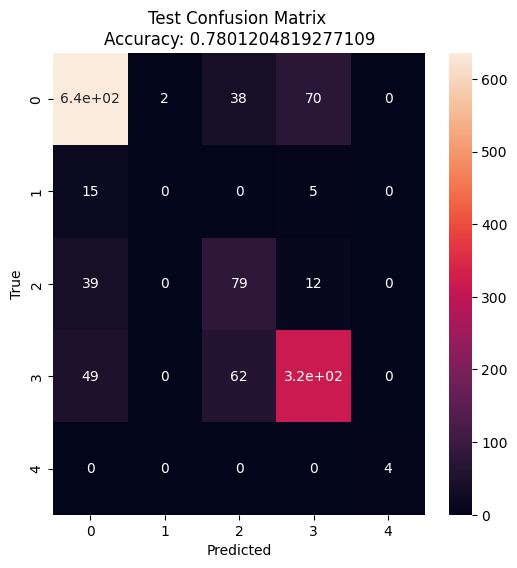

In [50]:
from sklearn.svm import SVC 
sv_model = SVC(kernel = 'linear', C = 1).fit(X_tr, y_train)
sv_predictions_tr = sv_model.predict(X_tr) 
sv_predictions_te = sv_model.predict(X_te) 

cm_sv_tr = confusion_matrix(y_train, sv_predictions_tr)
cm_sv_te = confusion_matrix(y_test, sv_predictions_te)


print('Confusion Matrix Train Data')
print(cm_sv_tr)
print('='*50)
print('Confusion Matrix Test Data')
print(cm_sv_te )
print('='*50)
print('Train Accuracy: ',sv_model.score(X_tr,y_train))
print('Test Accuracy: ',sv_model.score(X_te,y_test))
print('='*50)

cm_te_df3 = pd.DataFrame(cm_sv_te)

plt.figure(figsize =(6,6))
sns.heatmap(cm_te_df3, annot=True)
plt.title('Test Confusion Matrix \nAccuracy: {}'.format(sv_model.score(X_te,y_test)))
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()
print()

### Decision Tree

Confusion Matrix Train Data
[[2024    0  170   43    0]
 [  59    0    0    0    0]
 [ 101    0  283    5    0]
 [ 508    0  253  521    0]
 [  14    0    0    0    0]]
Confusion Matrix Test Data
[[681   0  57   8   0]
 [ 20   0   0   0   0]
 [ 42   0  84   4   0]
 [162   0  91 175   0]
 [  4   0   0   0   0]]
Train Accuracy:  0.7103742778196434
Test Accuracy:  0.7078313253012049


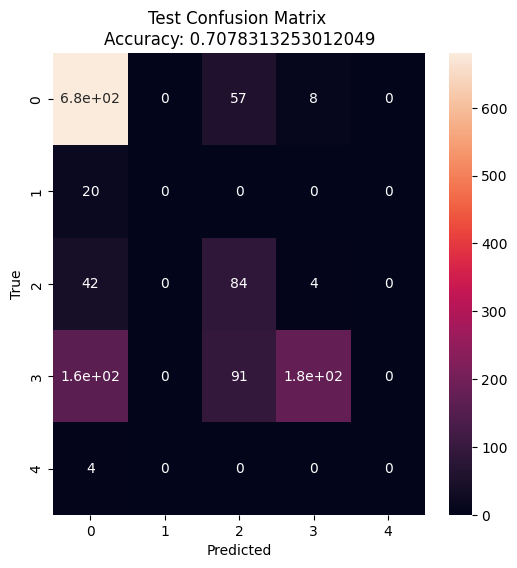

In [51]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_tr, y_train) 
dtree_predictions_tr = dtree_model.predict(X_tr) 
dtree_predictions_te = dtree_model.predict(X_te) 

cm_dt_tr = confusion_matrix(y_train, dtree_predictions_tr)
cm_dt_te = confusion_matrix(y_test, dtree_predictions_te)


print('Confusion Matrix Train Data')
print(cm_dt_tr)
print('='*50)
print('Confusion Matrix Test Data')
print(cm_dt_te )
print('='*50)
print('Train Accuracy: ',dtree_model.score(X_tr,y_train))
print('Test Accuracy: ',dtree_model.score(X_te,y_test))
print('='*50)

cm_te_df2 = pd.DataFrame(cm_dt_te)

plt.figure(figsize =(6,6))
sns.heatmap(cm_te_df2, annot=True)
plt.title('Test Confusion Matrix \nAccuracy: {}'.format(dtree_model.score(X_te,y_test)))
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()
print()